# Convolutional Neural Networks with Cifar-10

Convolutional Neural Network (CNNs, ConvNets) are built to work with spatial data, where the ordering and organization of information matters. Using traditional NNs for image processing requires a "flattening" approach, where each pixel corresponds with an input node. In contrast, data is fed into CNNs as a matrix (or tensor), instead of as a flat vector. In this lesson, we apply CNNs to classify images in the [Cifar-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which is one of the first datasets created for computer vision and is often used as a benchmark in many ML papers. 

## Load Data

In [2]:
import numpy as np
import tensorflow as tf
%run -i tools.py

In [3]:
train_images, train_labels, test_images, test_labels = load_data() # defined in tools.py
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)

In [4]:
print("Train images:", train_images.shape)
print("Train labels:", len(train_labels)) 
print("Test images:", test_images.shape)
print("Test labels", len(test_labels))
print("Number of classes:", len(classes))

Train images: (50000, 32, 32, 3)
Train labels: 50000
Test images: (10000, 32, 32, 3)
Test labels 10000
Number of classes: 10


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_image(index):
    print(classes[train_labels[index]])
    plot = plt.imshow(train_images[index])

truck


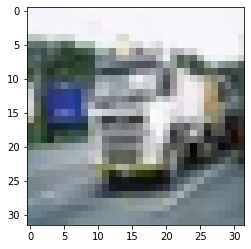

In [6]:
idx = 1000 
show_image(idx)

## Data Preprocessing

In [7]:
import keras
from keras.utils import to_categorical
from sklearn.utils import shuffle

X_train = train_images.astype('float32')
X_test = test_images.astype('float32')

# TODO: Normalize Features: Convert Pixels from the range 0-255 to 0-1
X_train /= 255.
X_test /= 255.
# TODO: One-Hot Encoding for Labels: ['cat', 'dog'] => [(0,1), (1,0)]
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)
# TODO: Shuffle Data
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [8]:
# Shorten Dataset (We would use all data in practice, but we don't have enough time :)
PERCENT_DATA_USED = .10 

num_train = int(PERCENT_DATA_USED * len(X_train))
num_test = int(PERCENT_DATA_USED * len(X_test))
X_train = X_train[:num_train]
y_train = y_train[:num_train]
X_test = X_test[:num_test]
y_test = y_test[:num_test]

print(len(X_train), len(y_train), len(X_test), len(y_test))

5000 5000 1000 1000


## Create Baseline

Can you beat the CAIS++ API?  We modified the code that we used to create the model in the first lesson so that it is compatible with Cifar-10.  See if you can beat it.  The CAIS++ API uses a strategy called [transfer learning](https://medium.com/kansas-city-machine-learning-artificial-intelligen/an-introduction-to-transfer-learning-in-machine-learning-7efd104b6026), where we start from a model trained on the [imagenet](https://en.wikipedia.org/wiki/ImageNet) dataset.  We "freeze" the convolutional layers of the model, so that those values will not be updated by training.  Finally, we add a new "head" to our model, which outputs the probability of 10 classes instead of the original 1000 used in imagenet.

In [9]:
# Create model using transfer learning (in tools.py)
model = create_model()

# Have to resize for InceptionV3 (the pretrained model)
# Nearest neighbors method gives the most representative of original
X_train_resized = tf.image.resize(X_train, [75, 75], method='nearest') 
X_test_resized = tf.image.resize(X_test, [75, 75], method='nearest')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 21,934,570
Trainable params: 131,786
Non-trainable params: 21,802,784
_________________________________________________________________


In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'],
             steps_per_epoch=1)

model.fit(X_train_resized, y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(X_test_resized, y_test),
          steps_per_epoch=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


ValueError: Invalid argument "steps_per_epoch" passed to K.function with TensorFlow backend

## Create Model

- [Convolutional Layers](https://keras.io/layers/convolutional/) 
    - filters: number of kernals (feature_detectors) in the layer
    - kernal_size: size of the kernal
    - activation: relu activation function typically used
    - padding: how to perserve information in borders
    - strides: how to slide kernal over the input (step size)
- [Pooling layers](https://keras.io/layers/pooling/)
   - max pooling: takes only the maximum pixel value from a region of pixels
   - pool_size: region of pixels to consider
- [Dropout](https://keras.io/layers/core/#dropout) 
    - randomly drop neurons during training, helps prevent overfitting
    - rate: percentage of neurons to drop
- [Batch norm layer](https://keras.io/layers/normalization/)
    - normalizes data at a given point in the network, helps prevent overfitting
- [Dense Layer](https://keras.io/layers/core/#dense) 
    - regular fully-connected layer in traditional NN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adadelta

In [ ]:
##########################################
#TODO: Create CNN
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
##########################################
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))
# model.add(BatchNormalization())

In [ ]:
##########################################
#TODO: Compile network
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

##########################################

In [ ]:

##########################################
#TODO: Train model
model.fit(X_train_resized, y_train,
          steps_per_epoch=64,
          epochs=10,
          verbose=1,
          validation_data=(X_test_resized, y_test), validation_steps=10)
##########################################